In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv('bike_sharing_daily.csv')

In [4]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [11]:
df['temp'].isna().sum() #17개의 결측치에 대해서 보간을 진행해 보겠습니다.

17

[]

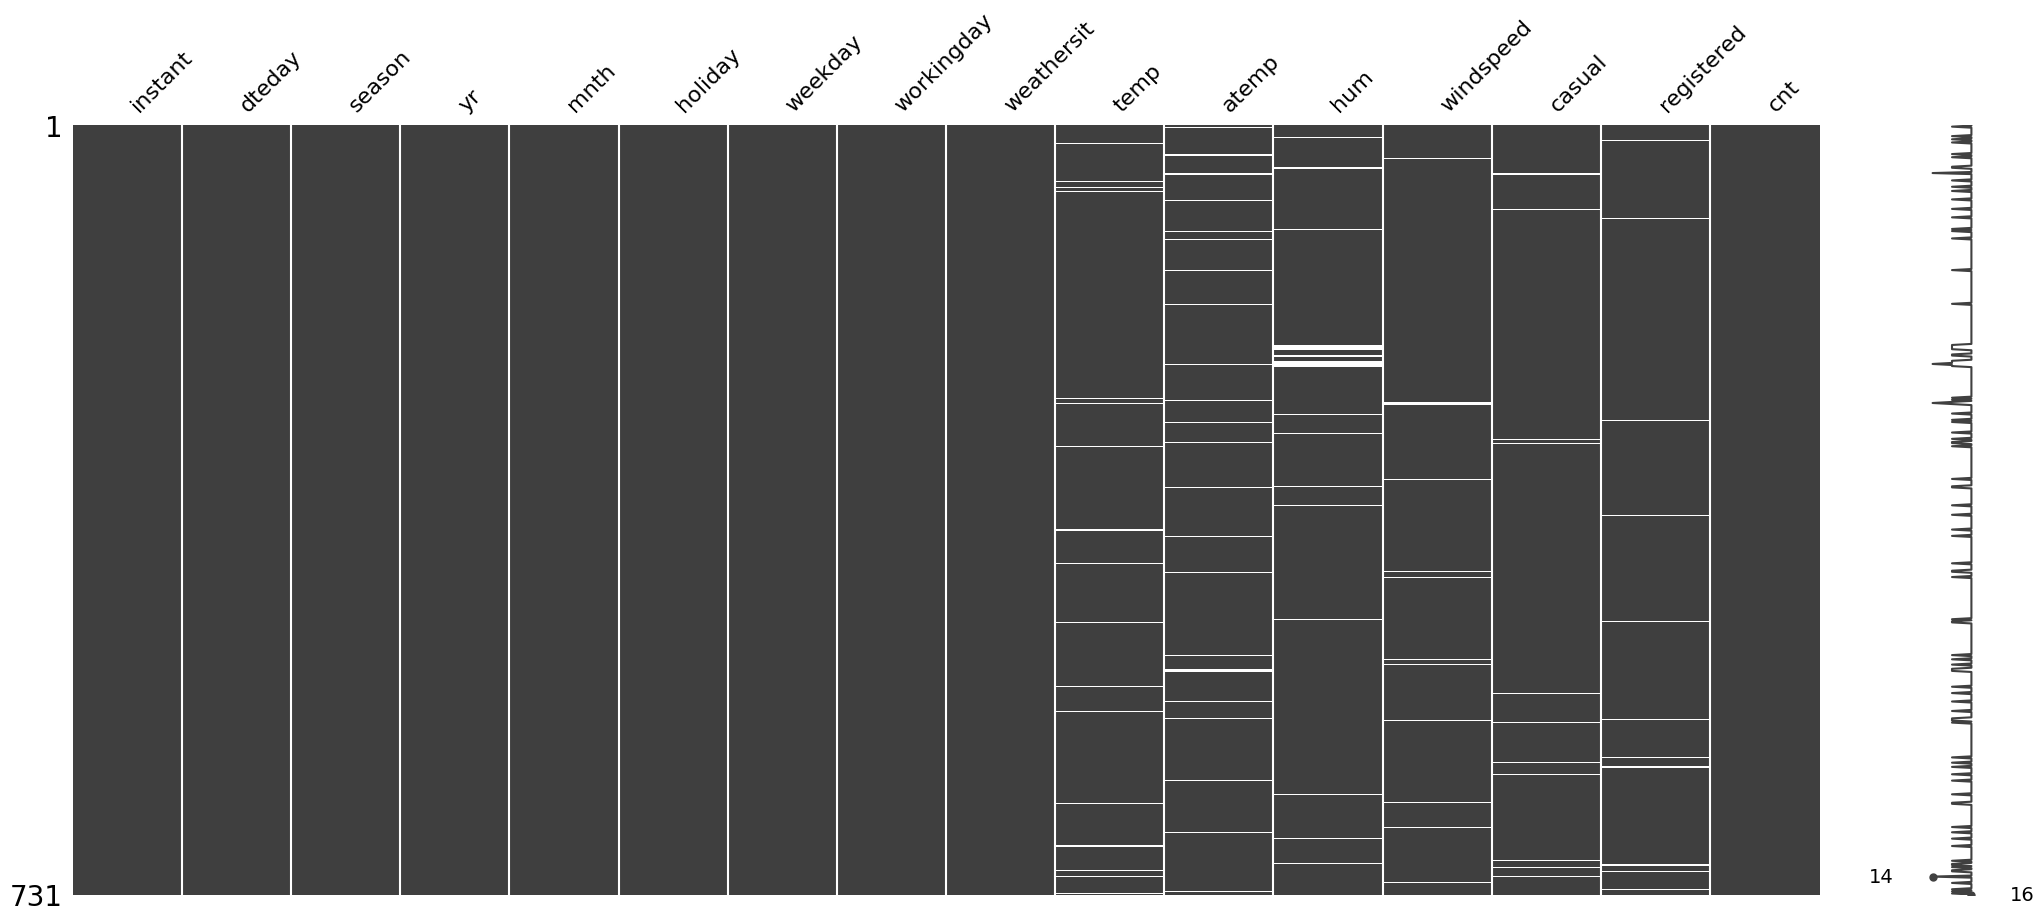

In [9]:
msno.matrix(df)
plt.plot()

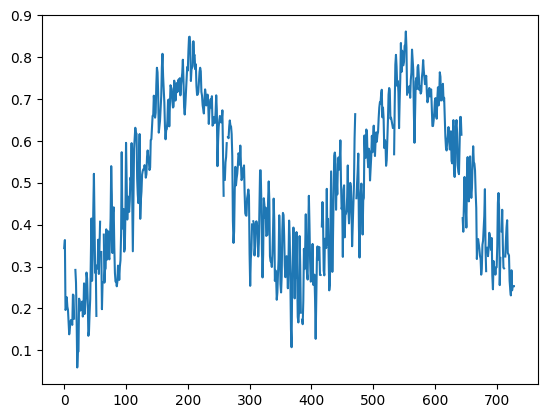

In [12]:
dfe=df['temp']
plt.plot(dfe)

<Axes: >

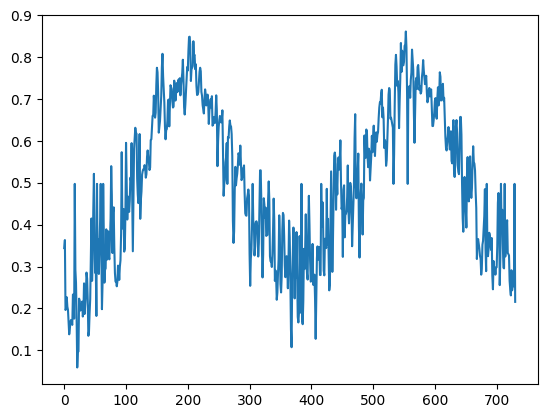

In [13]:
df['temp'].fillna(df['temp'].mean()).plot() #위에서 빈약한 부분이 좀 채워졌죠.

In [19]:
#시계열 방식으로 분석해보자
df['dteday'] = pd.to_datetime(df['dteday'],format = "%Y-%m-%d")
dfe=df.set_index('dteday')

<Axes: xlabel='dteday'>

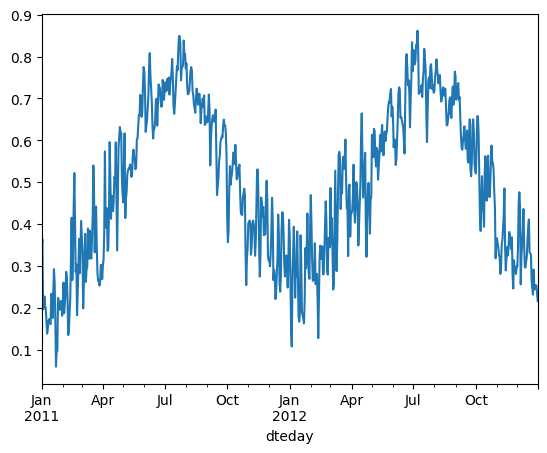

In [25]:
dfe['temp'].interpolate(method = 'linear').plot()

<Axes: xlabel='dteday'>

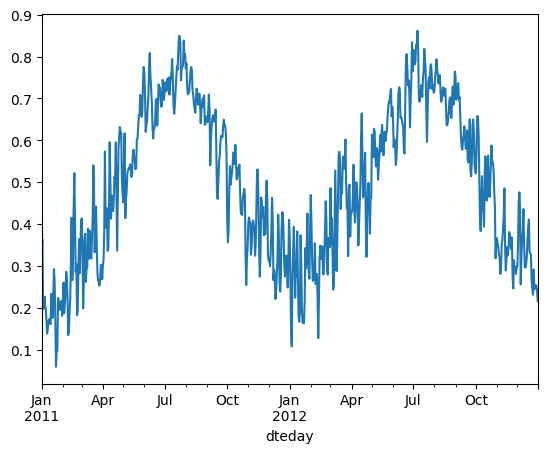

In [26]:
dfe['temp'].interpolate(method = 'quadratic').plot() #전체적으로 큰 차이는 못느끼나, 조금 더 부드러워지는 효과가 있다고 한다.

<Axes: xlabel='dteday'>

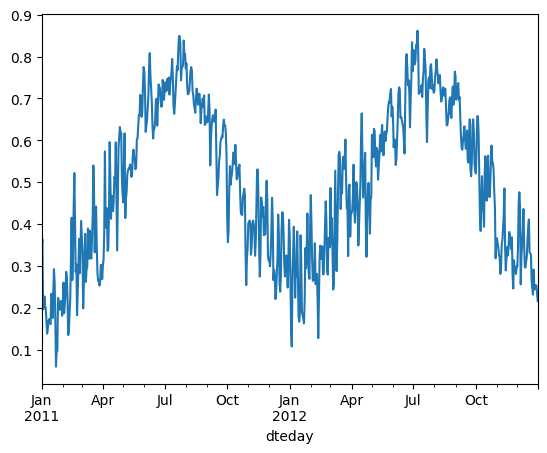

In [23]:
dfe['temp'].interpolate(method = 'time').plot() #시계열 관련 데이터에 사용하면 좋은 보간

<Axes: xlabel='dteday'>

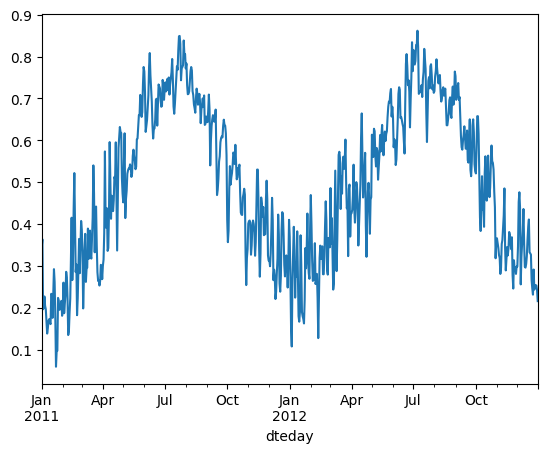

In [24]:
dfe['temp'].interpolate(method = 'pchip').plot()